In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics.api as smg

In [2]:
data = pd.read_csv("C:/Users/C5295630/Documents/DataScience/Assignment/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.shape

(50, 5)

In [5]:
data1 = data
data1['State'] = data["State"].astype("category")

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.8 KB


In [7]:
data1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

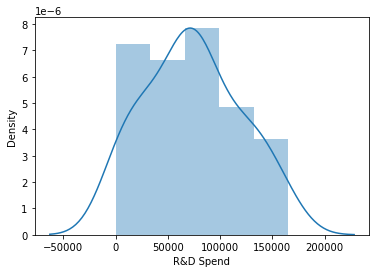

In [8]:
sns.distplot(data1['R&D Spend'])

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

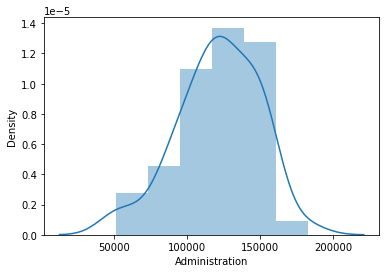

In [9]:
sns.distplot(data1['Administration'])

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

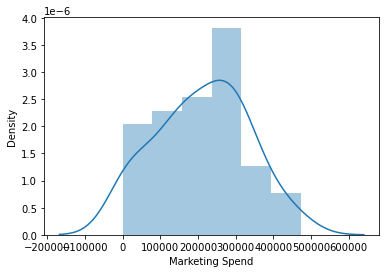

In [10]:
sns.distplot(data1['Marketing Spend'])

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

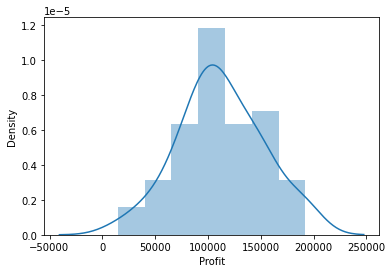

In [11]:
sns.distplot(data1['Profit'])

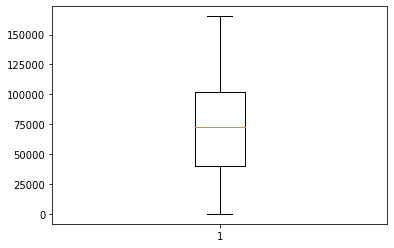

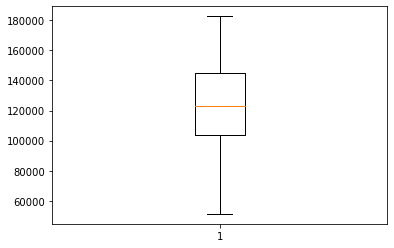

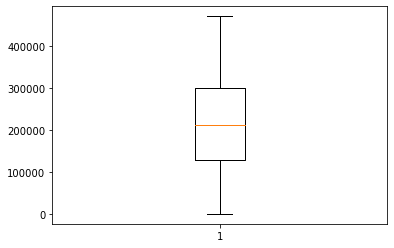

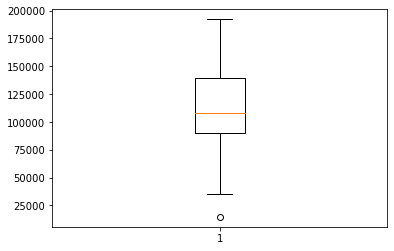

<Figure size 432x288 with 0 Axes>

In [12]:
plt.boxplot(data1['R&D Spend'])
fig=plt.figure()
plt.boxplot(data1['Administration'])
fig=plt.figure()
plt.boxplot(data1['Marketing Spend'])
fig=plt.figure()
plt.boxplot(data1['Profit'])
fig=plt.figure()

In [13]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


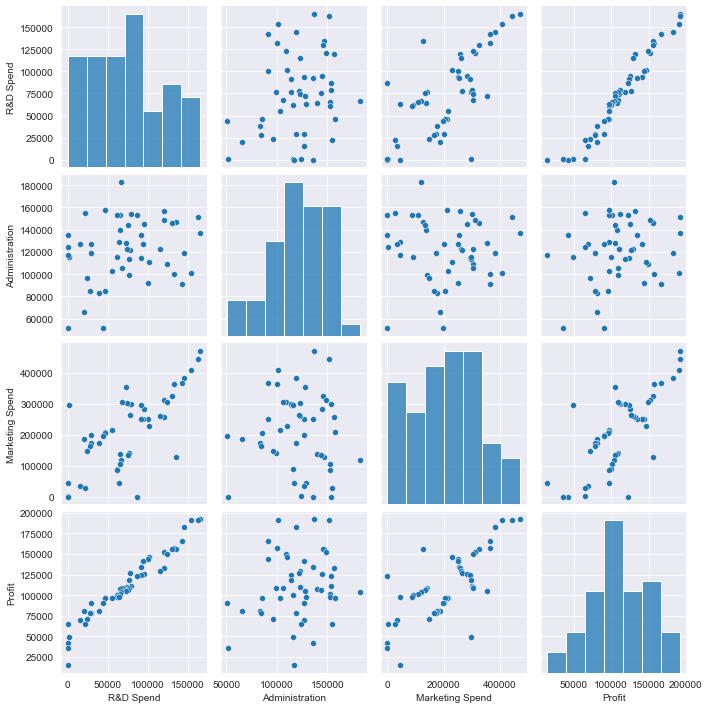

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [15]:
model1 = smf.ols("data1['Profit']~data1['R&D Spend']+data1['Administration']+data1['Marketing Spend']",data=data1).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data1['Profit']   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.53e-30
Time:                        11:49:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
data1['R&D Spend']           0.8057      0.045     17.846      0.000       0.715       0.897
data1['Administration']     -0.0268      0.051     -0.526      0.602      -0.130       0.076
data1['Marketing Spend']     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
sl_adm = smf.ols("data1['Profit']~data1['Administration']",data=data1).fit()
sl_adm.summary() ##low R-squared value and high p-value with AIC- 1203

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data1['Profit']   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.162
Time:                        11:49:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
data1['Administration']     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
sl_ms = smf.ols("data1['Profit']~data1['Marketing Spend']",data=data1).fit()
sl_ms.summary() ##low R-squared value and low p-value with AIC- 1164

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data1['Profit']   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        11:49:37   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                     6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
data1['Marketing Spend']     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
ml = smf.ols("data1['Profit']~data1['Administration']+data1['Marketing Spend']",data=data1).fit()
ml.summary() ##low R-squared value and low p-values for both with AIC- 1160

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data1['Profit']   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.50e-10
Time:                        11:49:37   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
data1['Administration']      0.3237      0.131      2.468      0.017       0.060       0.588
data1['Marketing Spend']     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
ml_adm = smf.ols("data1['Administration']~data1['R&D Spend']+data1['Marketing Spend']",data=data1).fit().rsquared
vif_adm = 1/(1-ml_adm)
print('vif_adm=' ,vif_adm )

ml_ms = smf.ols("data1['Marketing Spend']~data1['Administration']+data1['R&D Spend']",data=data1).fit().rsquared
vif_ms = 1/(1-ml_ms)
print('vif_ms=' ,vif_ms )

ml_rd = smf.ols("data1['R&D Spend']~data1['Marketing Spend']+data1['Administration']",data=data1).fit().rsquared
vif_rd = 1/(1-ml_rd)
print('vif_rd=' ,vif_rd)

vif_adm= 1.1750910070550458
vif_ms= 2.3267732905308773
vif_rd= 2.4689030699947017


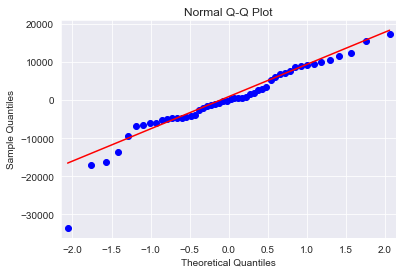

In [21]:
qqplot = sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q Plot')
plt.show()

In [22]:
residual = model1.resid

In [23]:
list(np.where(residual>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [35]:
from statsmodels.graphics.api import influence_plot

In [26]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

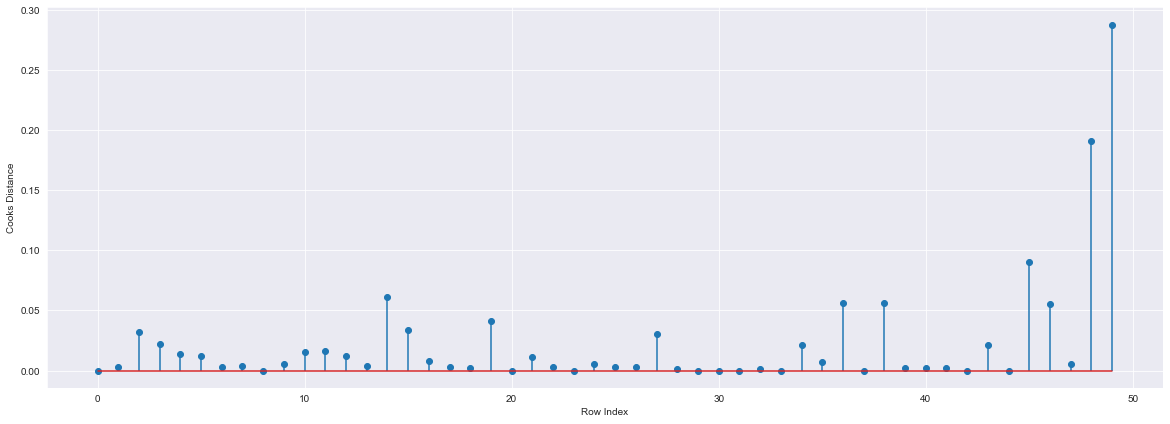

In [30]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

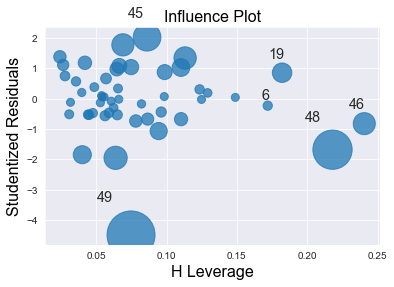

In [37]:
influence_plot(model1)
plt.show()

In [38]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [40]:
data1[data1.index.isin([48,49])] #need to remove these two rows from data

,R&D Spend,Administration,Marketing Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [47]:
data_n = data1

In [48]:
data2 = data_n.drop(data_n.index[[48,49]],axis=0).reset_index()
data2.shape

(48, 6)

In [49]:
data2.dtypes

index                 int64
R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [50]:
model2 = smf.ols("data2['Profit']~data2['R&D Spend']+data2['Administration']+data2['Marketing Spend']",data=data2).fit()

In [51]:
model2.summary() ##here we can consider this model as R-squared value is 0.96 and low p-values for all independet variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data2['Profit']   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           2.03e-31
Time:                        12:06:26   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
data2['R&D Spend']           0.7895      0.036     21.718      0.000       0.716       0.863
data2['Administration']     -0.0633      0.044     -1.442      0.156      -0.152       0.025
data2['Marketing Spend']     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
residual2 = model2.resid
residual2

0      3322.552516
1      6413.480873
2     10326.035810
3     10865.813027
4     -5500.401312
5     -6030.880480
6     -2087.104122
7     -2468.307984
8      2102.070710
9     -4978.733091
10     9697.953392
11     7276.322459
12    12226.663984
13     6896.046031
14   -15607.083354
15   -16252.312040
16     9540.456606
17    -4043.028834
18    -5016.815044
19     5175.388064
20     1340.968783
21    -4996.207099
22    -4510.961696
23    -2130.910559
24    -7457.948463
25     3763.061939
26    -5970.622860
27    -8885.682032
28     1610.843524
29    -2004.726384
30    -2319.139372
31    -1698.734414
32    -4324.317668
33    -3229.414349
34     7389.504597
35     2968.649909
36    13630.673333
37    -4022.413437
38     7207.113559
39    -6234.245930
40     1030.428705
41     -733.354335
42    -2671.343041
43     5887.983131
44    -2079.280923
45    12870.713444
46    -8329.151390
47    -7959.604182
dtype: float64

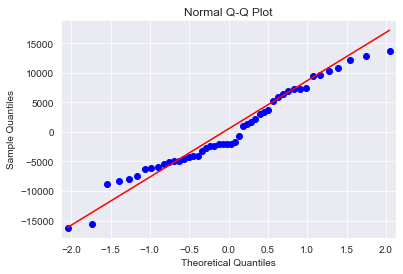

In [53]:
qqplot2 = sm.qqplot(model2.resid,line='q')
plt.title('Normal Q-Q Plot')
plt.show()

In [57]:
rmse = np.sqrt((np.sum(residual2**2))/48)
rmse

7036.4848100048